<a href="https://colab.research.google.com/github/hamzaharmanhusni/ProjectSkillAcademyPro/blob/main/Salinan_dari_cnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Project

## Student Identity

In [ ]:
# @title #### Student Identity
student_id = "REAJGDG4" # @param {type:"string"}
name = "Hamzah Arman Husni" # @param {type:"string"}
drive_link = "https://colab.research.google.com/drive/128_YWF1R5v7hXSk2lIvsQu7YEfMlTp56#scrollTo=7121cf4d-5979-4c79-bf6d-4ac19fd4d032"  # @param {type:"string"}

assignment_id = "00_cnn_project"

## Import Package

In [ ]:
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this CNN Project, you will create your own custom Image Classification. You can collect a dataset of images you are interested in and train a CNN model to differentiate between them. For example, a model could be trained to distinguish between different types of birds, cars, plants, or any other topic of interest.

In [ ]:
#Write any package/module installation that you need here

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder


## Task-1 Load the dataset

In this task, you will prepare and load your dataset. **You can choose any dataset you want**, make sure the data is diverse and large enough to prevent overfitting and improve the model's ability to generalize.

If you are using images from the internet, **please respect copyright and privacy laws**. Creative Commons licenses or public domain images are a safe bet, and many APIs (like the Unsplash API) provide access to a large number of such images.

### 1.1 Optional Custom Dataset
Provided below is a custom dataset template that you may want to use for your code. It's completely optional.

Alternatively, you can review the material on Data Augmentation or read the Pytorch tutorial https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

### 1.2 Write your code in the block below

In the code block below, prepare and load your dataset. Please include data preprocessing steps such as dividing the dataset into training, validation, and test sets, or data augmentation techniques that you used if any in this section. Do not put the code to build your model here.

Some techniques you may use:
- Find and load existing dataset from Huggingface or Kaggle. (Easy)
- Create your own custom dataset from the images you have in your possesion or internet search and load the dataset. (Hard)
- Etc.

Hint:
- Usually the dataset are loaded into train_dataset and test_dataset

In [ ]:
# Write your data preprocessing code here
# upload kaggle.json
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzaharmanhusni","key":"c4d80967f856d7def87f1797b082acbf"}'}

In [ ]:
# install dan konfigurasi kaggle API
!pip install -q kaggle

In [ ]:
# Pindahkan file kaggle.json ke direktori .kaggle:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Berikan izin akses yang tepat ke file kaggle.json:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset

 99% 1.18G/1.19G [00:11<00:00, 115MB/s] 
100% 1.19G/1.19G [00:11<00:00, 110MB/s]


In [ ]:
import zipfile

# Unzip file yang telah di download
nama_file_zip = 'coronahack-chest-xraydataset.zip'
zip_extractor = zipfile.ZipFile(nama_file_zip)
zip_extractor.extractall()
zip_extractor.close()

In [ ]:
import pandas as pd

df = pd.read_csv('Chest_xray_Corona_Metadata.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)

# Assuming 'label' is the correct column name
df[df['Label'] == 'Pnemonia']


,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1341,person101_virus_188.jpeg,Pnemonia,TRAIN,NaN,Virus
1342,person101_virus_187.jpeg,Pnemonia,TRAIN,NaN,Virus
1343,person1019_virus_1708.jpeg,Pnemonia,TRAIN,NaN,Virus
1344,person1019_virus_1707.jpeg,Pnemonia,TRAIN,NaN,Virus
1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,NaN,bacteria
...,...,...,...,...,...
5905,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


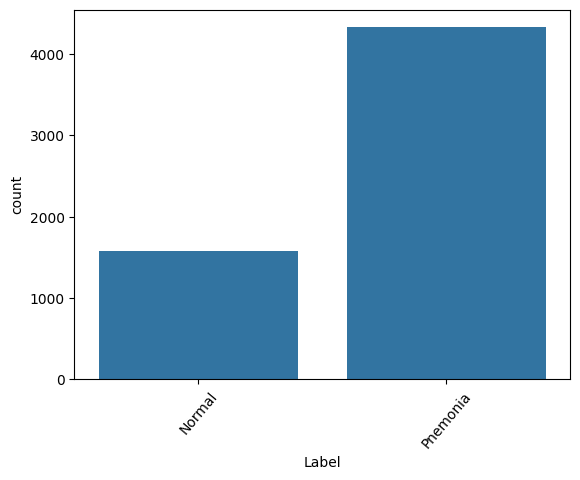

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = df["Label"])
plt.xticks(rotation = 50);

In [ ]:
train_data = len(df[df["Dataset_type"]=="TRAIN"])
test_data = len(df[df["Dataset_type"]=="TEST"])
print(f"train_data: {train_data}")
print(f"val_data: {test_data}")

train_data: 5286
val_data: 624


In [ ]:
#an example of creating our own custom dataset, you can use this if you want/need. Completely optional.
import os
import pandas as pd
from torchvision.io import read_image

# Pytorch essentials for datasets.
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomImageDataset(Dataset):

    def __init__(self, root_path, image_paths, image_labels, transforms_):
        self.root_path = root_path
        self.image_paths = image_paths
        self.image_labels = image_labels

        # We'll use transforms for data augmentation and converting PIL images to torch tensors.
        self.transforms_ = transforms_

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.root_path + self.image_paths.iloc[index]
        # img = Image.open(image_path).convert("LA")
        img = Image.open(image_path).convert("RGB")
        # img = Image.open(image_path)
        transformed_img = self.transforms_(img)
        if self.image_labels.iloc[index] == 'Normal':
            label = 0
        elif self.image_labels.iloc[index] == 'Pnemonia':
            label = 1
        return transformed_img, label


In [ ]:

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset'.
There are 0 directories and 5309 images in 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'.
There are 0 directories and 624 images in 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'.


In [ ]:
train_path = df[df["Dataset_type"]=="TRAIN"]['X_ray_image_name']
train_label = df[df["Dataset_type"]=="TRAIN"]['Label']

test_path = df[df["Dataset_type"]=="TEST"]['X_ray_image_name']
test_label = df[df["Dataset_type"]=="TEST"]['Label']

train_folder_path = "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/"
test_folder_path= "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/"

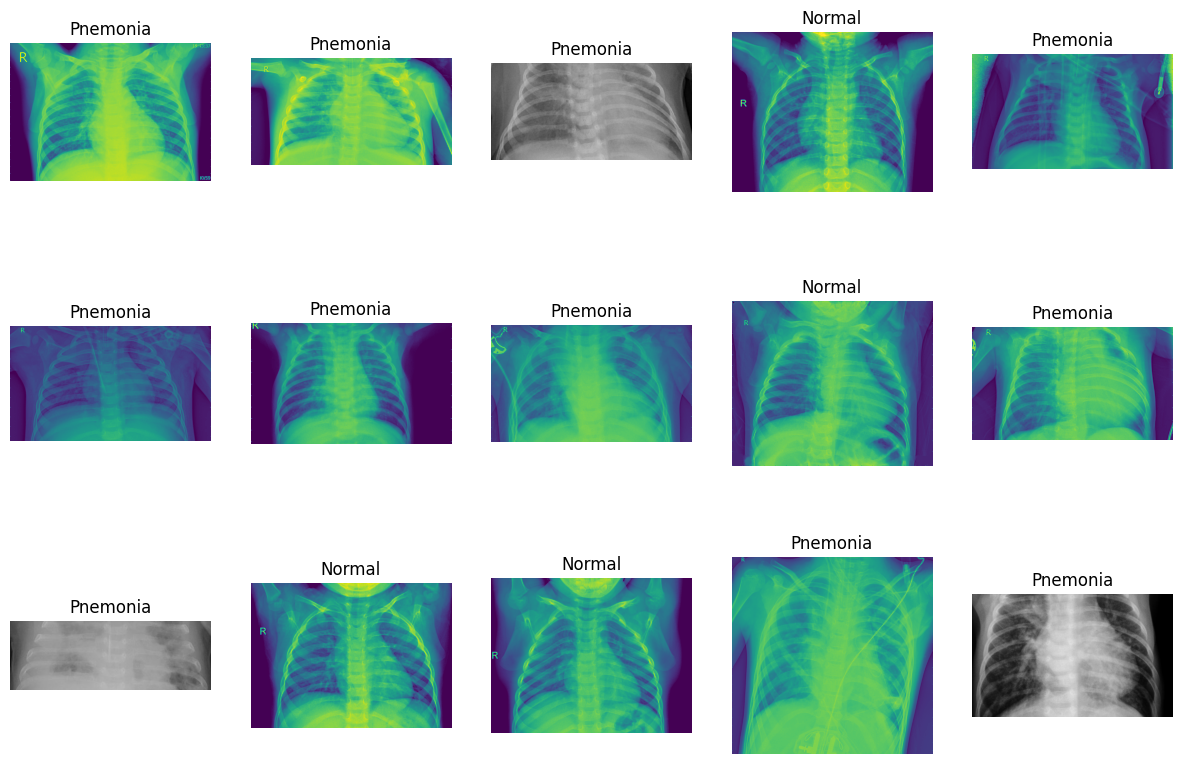

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

show_imgs = 15
idx = np.random.randint(0, len(train_path),size=show_imgs)
fig, axes = plt.subplots(show_imgs//5, 5, figsize=(15,10))
axes = axes.flatten()
for i, ax in enumerate(axes):
    full_path = train_folder_path + train_path.iloc[idx[i]]
    ax.imshow(plt.imread(full_path))
    ax.set_title(train_label.iloc[idx[i]])
    ax.set_axis_off()

In [ ]:
# Write your data preprocessing code here
# Define data transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load datasets
train_dataset = CustomImageDataset(train_folder_path, train_path, train_label,train_transform)
test_dataset = CustomImageDataset(test_folder_path, test_path, test_label,transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


### 1.3 Submission

You'll submit the link to your dataset for Task-1.

- If you use existing dataset from Kaggle or Huggingface, then you can put the link to those dataset here.

- If you use your own custom dataset, Upload and store the custom dataset in your Google Drive that you shared with us and put the link to the folder containing that dataset here.

In [ ]:
# Submit Method
dataset_link = "https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset" # Put your model link

question_id = "00_cnn_project_dataset"
submit(student_id, name, assignment_id, dataset_link, question_id, drive_link)

'Assignment successfully submitted'

## Task-2 Build your model

In this task, you will now build and save your model. You can either create your own CNN model or choose any pretrained model that you feel is most appropriate for your dataset.

### 2.1 Write your code in the block below

In the code block below, write the code to **create your model, either from scratch or fine tuning a pretrained model**. You will need to write the code for your model definition, such as the layers used, loss function and optimizer. Please include also the training and validation loops.

Make sure you **save your model to a file** and **measure the accuracy of your model**, as this will be submitted for this task.

Some techniques you may use:
- Use pretrained model. (Easy)
- Create a CNN model from scratch. (Hard)
- Etc.

Hint:
- Use GPU in Google Colab, it significantly improves the time taken for training, compared to CPU.
- **Google Colab GPU usage for free-tier have a limit**, which is unknown, so I suggest you try out in CPU mode that your code works without error, then use GPU for traininig.
- If you are going to upload to Huggingface by using the Transformer Trainer during training, make sure you use the Huggingface method. Refer to Transfer Learning section or read the documentation here: https://huggingface.co/docs/transformers/model_sharing

In [ ]:
import torchvision
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
from IPython.display import display


# Assume you have train_loader and test_loader from your CustomImageDataset
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate = 0.000001
batch_size = 16
num_epochs = 10
num_classes = 2
# Define the CNN model with fine-tuning
class FineTunedCNNModel(nn.Module):
    def __init__(self, num_classes):
        super(FineTunedCNNModel, self).__init__()
        # Load a pre-trained model (e.g., ResNet18)
        pretrained_model = torchvision.models.resnet18(pretrained=True)

        # Remove the original fully connected layers
        self.features = nn.Sequential(*list(pretrained_model.children())[:-2])

        # Add your custom layers for the specific task
        self.pool = nn.AdaptiveAvgPool2d(1)  # Global average pooling
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the fine-tuned model
num_classes = 2  # Adjust based on your dataset
fine_tuned_model = FineTunedCNNModel(num_classes=num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fine_tuned_model.parameters(), lr=learning_rate)

# Earlystopping
patience = 3
counter = 0
best_loss = np.inf

# Training loop
for epoch in range(num_epochs):
    fine_tuned_model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = fine_tuned_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation loop
    fine_tuned_model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = fine_tuned_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {val_loss / len(test_loader)}, Accuracy: {100 * accuracy}%")

        if val_loss < best_loss:
            counter = 0
            best_loss = val_loss
            torch.save(fine_tuned_model.state_dict(), "model.pth")
        else:
            counter += 1
        if counter >= patience:
            print("Earlystop!")
            break

Epoch 1/10, Loss: 0.5705081313848496, Accuracy: 82.8525641025641%
Epoch 2/10, Loss: 0.47340053766965867, Accuracy: 86.0576923076923%
Epoch 3/10, Loss: 0.4019778653979301, Accuracy: 85.73717948717949%


In [ ]:
# Test the model
fine_tuned_model.eval()
with torch.no_grad():
    test_correct = 0
    test_total = 0

    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = fine_tuned_model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    accuracy = test_correct / test_total
    print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8637820512820513%


### 2.2 Submission

You'll submit the link to your model and the accuracy score for your model in this section.

Remember to download or move/upload your model from Google Colab to your Google Drive. Put the link to the Google Drive for your model below.

If you use a different variable to store your accuracy, remember to also change the `accuracy` variable below.

In [ ]:
# Submit Method
model_link = "https://drive.google.com/file/d/18FeFLfp1FnZkHOnKKR8lSLwtDlHpp4Xt/view?usp=sharing" # Put your model link

question_id = "01_cnn_project_model_link"
submit(student_id, name, assignment_id, model_link, question_id, drive_link)
question_id = "02_cnn_project_model_accuracy"
submit(student_id, name, assignment_id, str(accuracy), question_id, drive_link)

'Assignment successfully submitted'

## Task-3 Model Inference

In this task, you will be exercising the application of your model, or as it's commonly referred to in AI terminology, you will be performing inference using your model.

Simply load your saved model from Task-2 and create an inference for the model. Where you'll feed an image as input and the model will output the label as well as the percentage of confidence for the label.

### 3.1 Write your code in the block below

In the code block below write the code to use the model you created in Task-2. Load the model and input image, afterwards, show the result of the label/class together with confidence level in percentage as well as the input image.

Saving person11_virus_38.jpeg to person11_virus_38 (1).jpeg
Predicted Class: Pneumonia (Confidence: 98.60%)


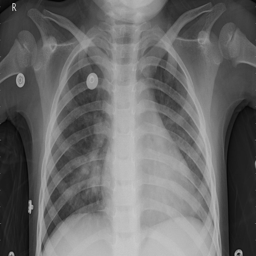

In [ ]:
# Write your code for inference here
import torch
import torchvision.transforms as transforms
from PIL import Image
from IPython.display import display

# saved model
model_path = '/content/model.pth'

# Initialize the model
loaded_model = FineTunedCNNModel(num_classes=2).to(device)

# Load the saved model state dict
loaded_model.load_state_dict(torch.load(model_path, map_location=device))
loaded_model.eval()

# transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Choose an image from device
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and preprocess the input image
input_image = Image.open(image_path).convert("RGB")
input_tensor = transform(input_image).to(device)  # Move to GPU
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# predictions
with torch.no_grad():
    output = loaded_model(input_batch)

# probabilities and predicted class
probabilities = torch.nn.functional.softmax(output[0], dim=0)
confidence_percentage, predicted_class = torch.max(probabilities, 0)

# Display predicted class
predicted_label = 'Normal' if predicted_class.item() == 0 else 'Pneumonia'
print(f"Predicted Class: {predicted_label} (Confidence: {confidence_percentage.item() * 100:.2f}%)")

# Resize the input image for display
resized_input_image = input_image.resize((256, 256))  # Adjust the size as needed

# Display the resized input image
display(resized_input_image)


### 3.2 Submission

You'll submit a screenshot of your inference in this section. Remember to save the screenshot first before submitting it.

Hint:

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

- In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

    - Image name screenshot is `submission.jpg`. If you change the name of the screenshot  file, change it also in the submit_image parameter.
    - The input image and label as well as percentage of confidence should be included in the screenshot

Here is an example of a correct screenshot:

![Screenshot submission sammple - hummer](https://storage.googleapis.com/rg-ai-bootcamp/projects/project-5-cnn-hummer.png)

In [ ]:
# Submit Method

question_id = "03_cnn_project_inference"
submit_image(student_id, question_id, './submission.png')

'Assignment successfully submitted'

## Task-4 Model Publishing

In this task, you will push your model to Huggingface. Once you've pushed your model to the Hugging Face Model Hub, you'll have a link that points directly to your model's page. You can share this link with others, and they can use it to directly load your model for their own uses.

### 4.1 Write your code in the block below

In the code block below, write the code to push your model to Huggingface. There are several methods to do this, please refer to the documentation: https://huggingface.co/docs/transformers/model_sharing

Some techniques you may use:
- If you use the Transformer Trainer during the training loop when you create your model above, then you can simply put your `trainer.push_to_hub()` here.
- You can also use the web interface on Huggingface.

Hint:
- Remember to login first to your Huggingface account.
- If you are pushing programmaticaly, then use the huggingface-cli to login.

In [ ]:
#Write your code for publishing here

!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Your token has been saved in your con

### 4.2 Submission

You'll submit a a link to your huggingface model in this section.

The following link is an example of what a trained model's page looks like: https://huggingface.co/aditira/emotion_classification. This is not your model, but rather an example of what your final result might resemble.

Remember, for this project you should push your output model to your own Hugging Face account. The link for your model will be different and should reflect your own username and model name.

In [ ]:
# Submit Method
huggingface_model_link = "https://huggingface.co/Hamzaharman/PneumoniaClassification/tree/main" # Put your model link

question_id = "04_cnn_project_publish"
submit(student_id, name, assignment_id, huggingface_model_link, question_id, drive_link)

'Assignment successfully submitted'

FIN